In [1]:
import pandas as pd

GAfile_path = r'../../../4-comparison/1-globalsearch/0-data/1-GA/1-SG-max/meanall.csv'
GA50file_path = r'../../0-data/BO-GA/1-50/1-SG-max/meanall.csv'
GA100file_path = r'../../0-data/BO-GA/2-100/1-SG-max/meanall.csv'
BOfile_path = r'../../../4-comparison/1-globalsearch/0-data/4-BO/1-SG-max/mean.log'
MCTSfile_path = r'../../../4-comparison/1-globalsearch/0-data/5-MCTS/1-SG-max/mean.log'

GAdata = pd.read_csv(GAfile_path, usecols=lambda x: x != 'Unnamed: 0')
GA50data = pd.read_csv(GA50file_path, usecols=lambda x: x != 'Unnamed: 0')
GA100data = pd.read_csv(GA100file_path, usecols=lambda x: x != 'Unnamed: 0')

GA_means = GAdata.mean().tolist()
GA50_means = GA50data.mean().tolist()
GA100_means = GA100data.mean().tolist()

BOITC_limitvalue_mean_list = []
with open(BOfile_path, 'r') as resultlog:
    resultlog_lines = resultlog.readlines()

for index, line in enumerate(resultlog_lines):
    BOITC_limitvalue_mean_list.append(float(line.split()[-1]))
    
MCTSITC_limitvalue_mean_list = []
with open(MCTSfile_path, 'r') as resultlog:
    resultlog_lines = resultlog.readlines()

for index, line in enumerate(resultlog_lines):
    MCTSITC_limitvalue_mean_list.append(float(line.split()[-1]))

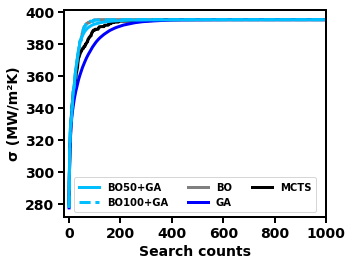

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 3.8))
plt.plot(BOITC_limitvalue_mean_list, label='BO', color='grey', linewidth=3)
plt.plot(MCTSITC_limitvalue_mean_list, label='MCTS', color='black', linewidth=3)
plt.plot(GA_means, label='GA', color='blue', linewidth=3)
plt.plot(GA50_means, label='BO50+GA', color=(0, 191/255, 1), linestyle='-', linewidth=3)
plt.plot(GA100_means, label='BO100+GA', color=(0, 191/255, 1), linestyle='--', linewidth=3)
plt.xlabel('Search counts', fontsize=14, fontweight='bold')
plt.ylabel('σ (MW/m²K)', fontsize=14, fontweight='bold')

handles, labels = plt.gca().get_legend_handles_labels()
order = [3, 4, 0, 2, 1]
handles = [handles[i] for i in order]
labels = [labels[i] for i in order]
legend = plt.legend(handles, labels, loc='lower center', ncol=3, bbox_to_anchor=(0.5, 0.0), borderpad=0.5, prop={'weight':'bold'})

plt.gca().spines['top'].set_linewidth(2)
plt.gca().spines['right'].set_linewidth(2)
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['left'].set_linewidth(2)
plt.tick_params(axis='both', which='major', width=2, length=6)
plt.xticks(fontsize=14, fontweight='bold')
plt.yticks(fontsize=14, fontweight='bold')
plt.xlim(-20, 1000)
plt.tight_layout()
plt.savefig('1global.jpg', dpi=800)
plt.show()